## **IMPORT LIBRARIES**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)          
import matplotlib.pyplot as plt # visualization
# plt.rcParams.update({'font.size': 14})
import seaborn as sns # visualization
import math 
import warnings # Supress warnings 
warnings.filterwarnings('ignore')
from keras.models import Sequential 
from keras.layers import Activation, Dense , Concatenate,BatchNormalization  

In [12]:
import keras
from tensorflow.python.keras.models import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.advanced_activations import LeakyReLU
from keras.layers import ELU, PReLU, LeakyReLU
import tensorflow 
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
import tqdm
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image
from pandas.core.internals.concat import concat_arrays  # type: ignore
from keras.layers import Concatenate
from keras.models import Model
from keras.layers import Input, Dense, concatenate


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import argparse
import imutils
import cv2
import os
import gdown
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from rich.progress import track


## **READING THE DATA**

In [14]:
# To download the dataset we used this code, you need to use file called "kaggle.json"

# ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle

# ! chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d ahmedibrahimsalem/satellite-images

In [15]:
# To unzip the dataset 
# !unzip /home/ahmed/queens_project/final_project/satellite-images.zip

In [34]:
# To read test drive data after we made preprocessing 
test_drive_df= pd.read_csv('/home/ahmed/queens_project/final_project/ts_drive.csv' ) 

In [36]:
# Show the dataset
test_drive_df

,Rec_Lat,Rec_Long,RSRP,serving_Lat,serving_Long,distance,Bearing_angle,PL
0,30.01471,31.45804,-66.5625,30.010772,31.456667,0.456179,-112.230030,121.949087
1,30.01472,31.45804,-66.5625,30.010772,31.456667,0.457239,-112.179183,121.983458
2,30.01472,31.45805,-66.5625,30.010772,31.456667,0.457520,-112.324916,121.992532
3,30.01472,31.45806,-66.8125,30.010772,31.456667,0.457802,-112.470345,122.001660
4,30.01472,31.45807,-67.3125,30.010772,31.456667,0.458086,-112.615469,122.010843
...,...,...,...,...,...,...,...,...
173803,30.00205,31.46490,-76.8750,30.002019,31.461689,0.357060,-179.528178,118.324080
173804,30.00205,31.46491,-76.8750,30.002019,31.461689,0.358171,-179.529643,118.370088
173805,30.00205,31.46492,-76.6875,30.002019,31.461689,0.359283,-179.531099,118.415953
173806,30.00205,31.46493,-79.3750,30.002019,31.461689,0.360395,-179.532546,118.461676


In [37]:
# Read the path of the satellite images  
path = '/home/ahmed/queens_project/final_project/Satellite_Image/Satellite_Images' # current directory
filenames = [os.path.abspath(os.path.join(path, x)) for x in os.listdir(path) if '.jpg' in x]
# filenames

In [38]:
# Sort the satellite images and store them in dataframe 
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]


filenames.sort(key=natural_keys)

images_df= pd.DataFrame()
images_df["images"] = filenames

images_df

,images
0,/home/ahmed/queens_project/final_project/Satel...
1,/home/ahmed/queens_project/final_project/Satel...
2,/home/ahmed/queens_project/final_project/Satel...
3,/home/ahmed/queens_project/final_project/Satel...
4,/home/ahmed/queens_project/final_project/Satel...
...,...
86899,/home/ahmed/queens_project/final_project/Satel...
86900,/home/ahmed/queens_project/final_project/Satel...
86901,/home/ahmed/queens_project/final_project/Satel...
86902,/home/ahmed/queens_project/final_project/Satel...


In [39]:
# To check if the image allocated in her index 
images_df["images"][300]

'/home/ahmed/queens_project/final_project/Satellite_Image/Satellite_Images/img_300.jpg'

In [17]:
# test_drive_df["images"]=np.nan
# for i in test_drive_df.index:
#   test_drive_df["images"][i]=images_df["images"][i]

In [40]:
# Read the satellite images and resize them from (640,640) to (160,160) and save them  
output=[]
for i in track(images_df.index):
  src = cv2.imread(str(images_df["images"][i]), cv2.IMREAD_UNCHANGED)

  width=160
  height=160

  # dsize
  dsize = (width, height)

  # resize image
  output.append(cv2.resize(src, dsize))

  cv2.imwrite(str(images_df["images"][i]),output[i])


Output()

In [49]:
# Use the same data of images to the generated rows 
all_img = output+output

In [53]:
test_drive_df

,Rec_Lat,Rec_Long,RSRP,serving_Lat,serving_Long,distance,Bearing_angle,PL
0,30.01471,31.45804,-66.5625,30.010772,31.456667,0.456179,-112.230030,121.949087
1,30.01472,31.45804,-66.5625,30.010772,31.456667,0.457239,-112.179183,121.983458
2,30.01472,31.45805,-66.5625,30.010772,31.456667,0.457520,-112.324916,121.992532
3,30.01472,31.45806,-66.8125,30.010772,31.456667,0.457802,-112.470345,122.001660
4,30.01472,31.45807,-67.3125,30.010772,31.456667,0.458086,-112.615469,122.010843
...,...,...,...,...,...,...,...,...
173803,30.00205,31.46490,-76.8750,30.002019,31.461689,0.357060,-179.528178,118.324080
173804,30.00205,31.46491,-76.8750,30.002019,31.461689,0.358171,-179.529643,118.370088
173805,30.00205,31.46492,-76.6875,30.002019,31.461689,0.359283,-179.531099,118.415953
173806,30.00205,31.46493,-79.3750,30.002019,31.461689,0.360395,-179.532546,118.461676


In [54]:
# Convert the list of matrix to array 
X_2_train = np.array(all_img)
# y contain the label 
y = test_drive_df["RSRP"]
X = test_drive_df.drop(columns=["RSRP"]  , axis=1)

In [38]:
# # define standard scaler
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(X)

# **Main Model**

## **Network 1 Architecture For Numerical Features**

In [72]:
# Network 1 to handel numerical dataset 
numerical_input = X
# network 1
numerical_input = Input(shape=(7,))
dense1 = Dense(64,input_dim=7, activation="relu")(numerical_input)
dense2 = Dense(64, activation="relu")(dense1)
dense3 = Dense(64, activation="relu")(dense2)
# dense4 = Dense(128, activation="relu")(dense3)
dense5 = Dense(64, activation="relu")(dense3)
numerical_output = Dense(64, activation="relu")(dense5)
model_net1 = Model(inputs=numerical_input, outputs=numerical_output)

In [73]:
# Show the symmary of the network 1 
model_net1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
Total params: 17,152
Trainable params: 17,152
Non-trainable p

In [74]:
print(model_net1.output_shape)

(None, 64)


## **Network 2 Architecture For Image data**

### **AlexNet Architecture**

In [75]:
# network 2 to handle the satellite images and extract the some featurs that affect on RSRP value 
Cnn_input = X_2_train
# network 2
Cnn_input = Input(shape=(160,160,3))
#1st Convolutional Layer
x = Conv2D(filters=96, input_shape=(160,160,3), kernel_size=(11,11), strides=(4,4), padding='same')(Cnn_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(x)
 
#2nd Convolutional Layer
x = Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(x)
 
#3rnd Convolutional Layer
x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
 
#4th Convolutional Layer
x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
 
#5th Convolutional Layer
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(x)
 
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(256, activation="relu")(x)
model_net2 = Model(inputs=Cnn_input, outputs=x)

In [76]:
# Show the model summary  
model_net2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 40, 40, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 40, 40, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 40, 40, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       6146

## **Concatenate the output of Model_Cnn and Model_net1**

In [78]:
# Combination of the output of the two networks
models_combination = concatenate([model_net1.output, model_net2.output])

## **Network 3 Architecture For Final Output**

In [79]:
# Network 3 to take the combination of the last two model and go through these dense layers
dense1 = Dense(128, activation="relu")(models_combination)
dense2 = Dense(64, activation="relu")(dense1)
# dense2 = Dense(64, activation="relu")(dense2)
dense3 = Dense(32, activation="relu")(dense2)
final_model = Dense(1, activation="linear")(dense3)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[model_net1.input, model_net2.input], outputs=final_model)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 40, 40, 96)   34944       ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 40, 40, 96)  384         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

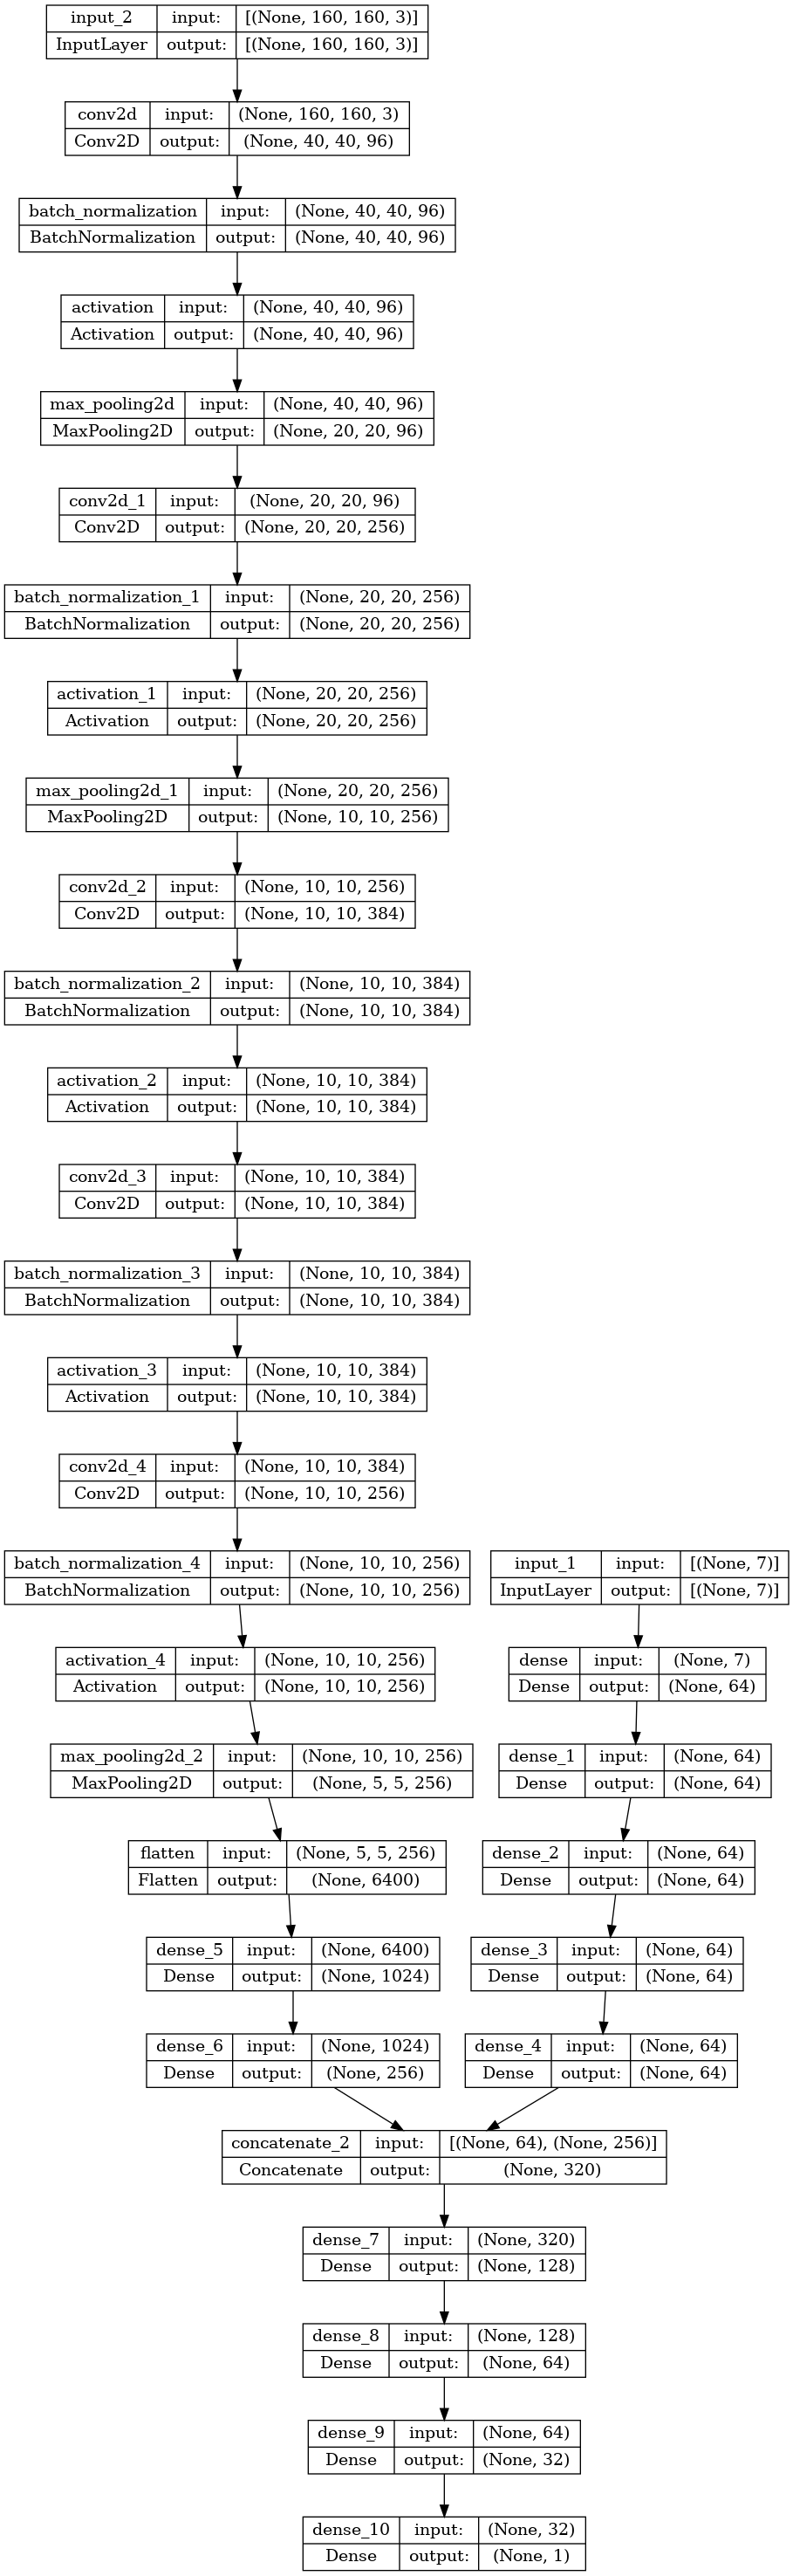

In [80]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

### **Train model**

In [81]:
# Compile the model
model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [82]:
# train the model on test drive data and satellite images 
model.fit(x=[X, X_2_train], y=y,validation_split=0.2,epochs=15, batch_size=128 )

Epoch 1/15


2022-10-27 19:40:52.729294: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 10678732800 exceeds 10% of free system memory.


1087/1087 [==============================] - 2433s 2s/step - loss: 4.5130 - root_mean_squared_error: 6.8411 - val_loss: 3.8602 - val_root_mean_squared_error: 4.9810
Epoch 2/15
1087/1087 [==============================] - 2461s 2s/step - loss: 2.7259 - root_mean_squared_error: 3.5552 - val_loss: 3.1305 - val_root_mean_squared_error: 3.9698
Epoch 3/15
1087/1087 [==============================] - 2436s 2s/step - loss: 2.2202 - root_mean_squared_error: 2.9247 - val_loss: 2.8183 - val_root_mean_squared_error: 3.5570
Epoch 4/15
1087/1087 [==============================] - 2750s 3s/step - loss: 1.9671 - root_mean_squared_error: 2.6014 - val_loss: 2.1250 - val_root_mean_squared_error: 2.8135
Epoch 5/15
1087/1087 [==============================] - 2500s 2s/step - loss: 1.9262 - root_mean_squared_error: 2.5337 - val_loss: 2.6768 - val_root_mean_squared_error: 3.4678
Epoch 6/15
1087/1087 [==============================] - 1854s 2s/step - loss: 1.7403 - root_mean_squared_error: 2.3070 - val_loss: 

In [83]:
# Save the model as Multimodal_model.h5
model.save('Multimodal_model.h5')

In [ ]:
# clear session 
tf.keras.backend.clear_session()